# Problem 5

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, chisquare, f_oneway
import seaborn as sns

In [75]:
data = pd.read_csv("data/Data_For_Problem_5.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [76]:
# Yaşı 60 olanların sayısı ve 60 yaşında ölüm oranı
age_sixty=data[data['age']==60]
age_sixty.shape

(33, 13)

In [77]:
def check_df(dataframe, head=10):
    '''
    Provides general information about the loaded data.

    Parameters
    ----------
    dataframe: dataframe
    head: int

    Notes
    ----------
    The head value is set to a constant 5.
    '''
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Corr #####################")
    print(dataframe.corr())
    print("##################### Describe #####################")
    print(dataframe.describe().T)

check_df(data)

##################### Shape #####################
(299, 13)
##################### Types #####################
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
##################### Head #####################
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0       

<Figure size 1500x1000 with 0 Axes>

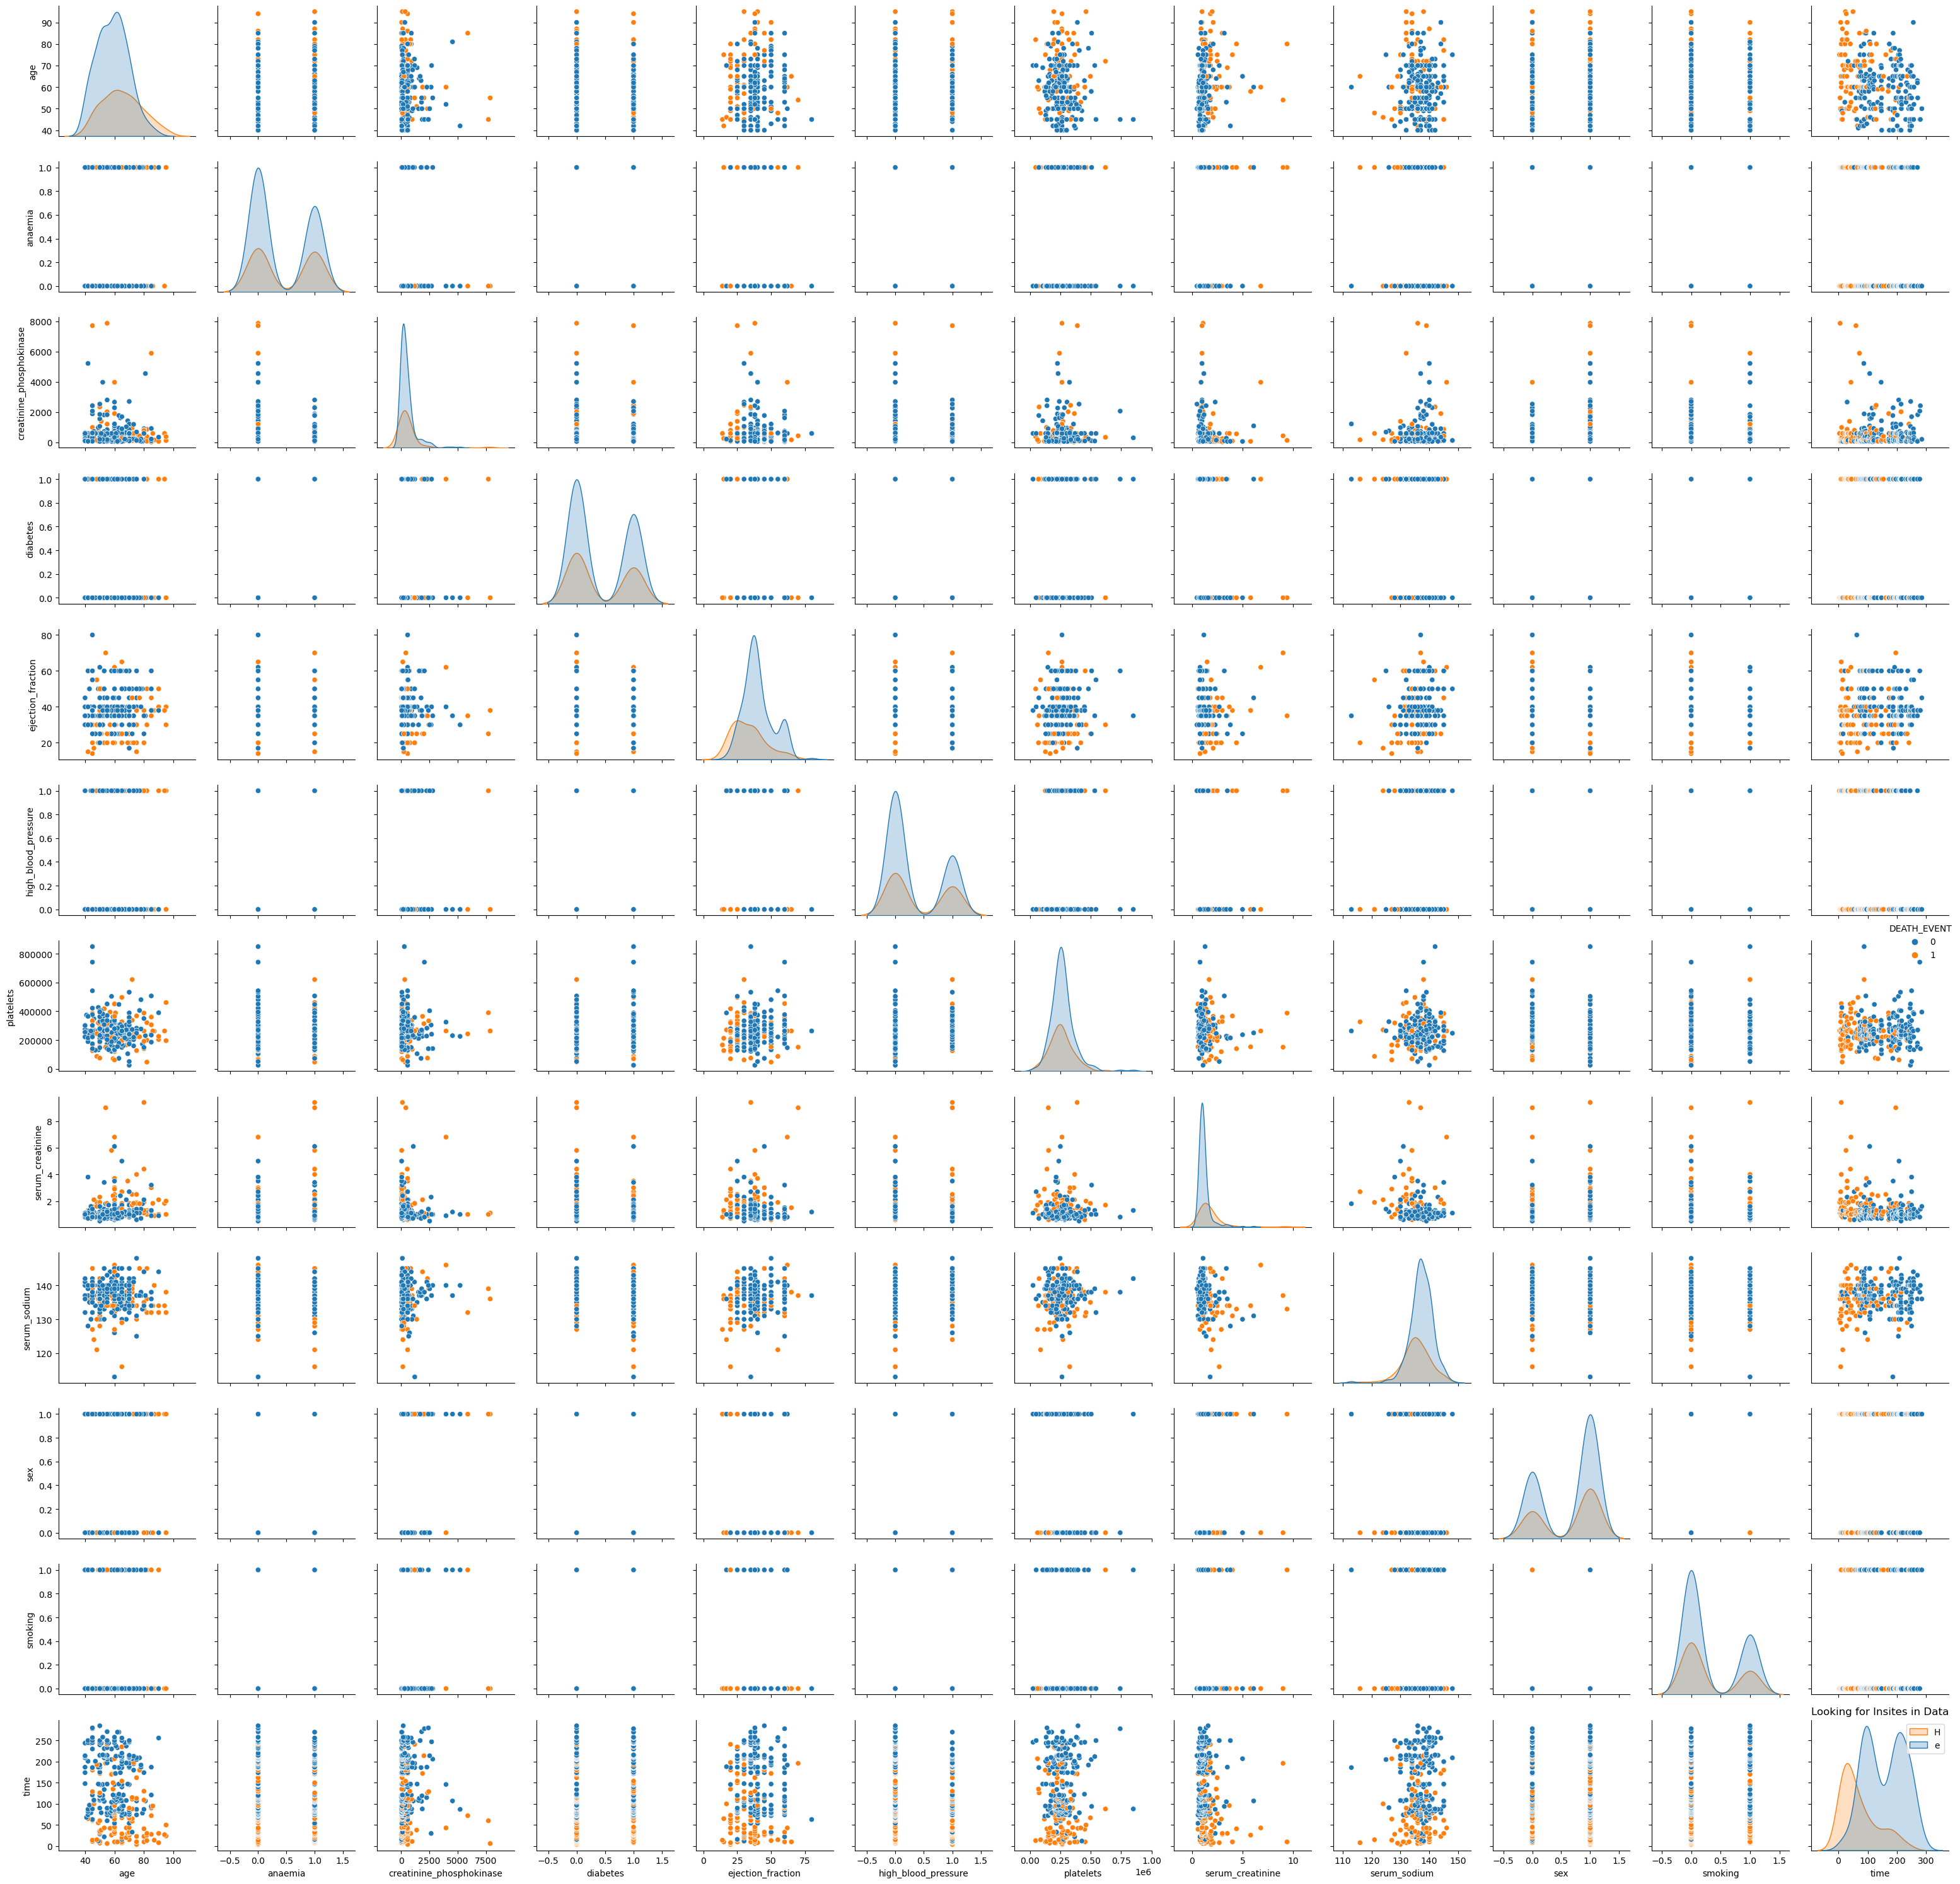

In [90]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="DEATH_EVENT")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()

<AxesSubplot:>

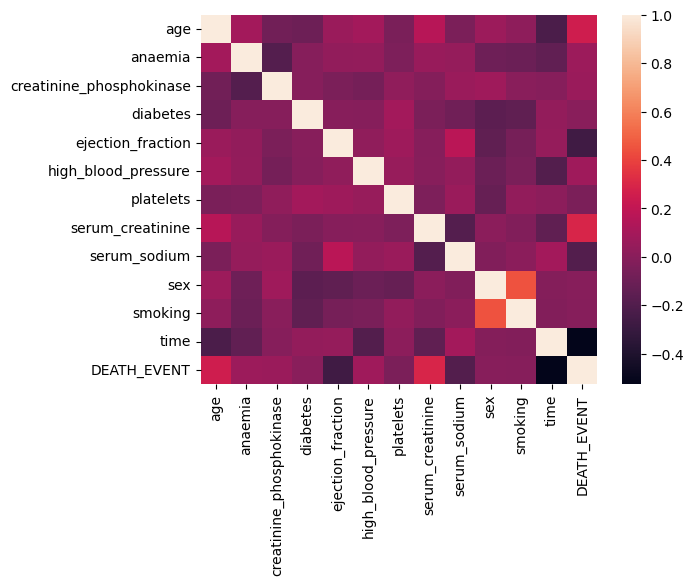

In [78]:
sns.heatmap(data.corr())

In [79]:
def data_metrics(data, column):
    print("Mean: ",data[column].mean())
    print("Median: ",data[column].median())
    print("Variance: ",data[column].var())
    print("Standard Deviation: ",data[column].std())

data_metrics(data,'age')

Mean:  60.83389297658862
Median:  60.0
Variance:  141.48648290797084
Standard Deviation:  11.894809074044478


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

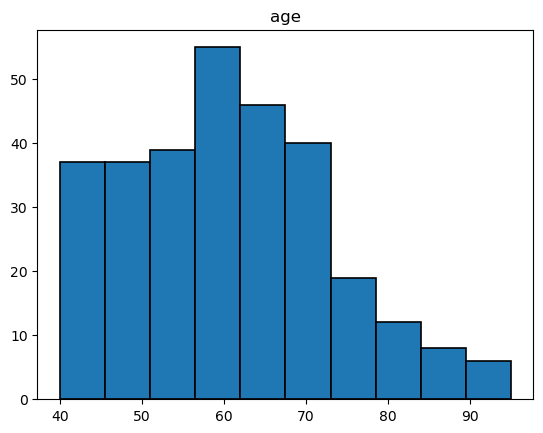

In [80]:
data.hist(column='age',grid=False,edgecolor='black', linewidth=1.2)

### T-test

In [81]:
heart_failure_age = data['age']

t_statistic, p_value = ttest_1samp(heart_failure_age, 60,alternative='two-sided')

print("One-sample t-test results:")
print("Null hypothesis: The population mean of age is equal to 60. ")
print("Alternative hypothesis: The population mean of age is not equal to 60.")
print("Test statistic:", t_statistic)
print("P-value:", p_value)

if(p_value <  0.05):
    print("Reject Null Hypothesis")
else:
    print("Not to Reject NUll Hypothesis")

One-sample t-test results:
Null hypothesis: The population mean of age is equal to 60. 
Alternative hypothesis: The population mean of age is not equal to 60.
Test statistic: 1.212239510102878
P-value: 0.226380929785253
Not to Reject NUll Hypothesis


#### Chi Square Test

In [82]:
age_forty_fifty_and_death = data.loc[(data['age'] >= 40) & (data['age'] <= 50) & (data['DEATH_EVENT'] == 1)]
age_fifty_sixty_and_death = data.loc[(data['age'] >= 50) & (data['age'] <= 60) & (data['DEATH_EVENT'] == 1)]
age_sixty_seventy_and_death = data.loc[(data['age'] >= 60) & (data['age'] <= 70) & (data['DEATH_EVENT'] == 1)]
age_seventy_eighty_and_death = data.loc[(data['age'] >= 70) & (data['age'] <= 80) & (data['DEATH_EVENT'] == 1)]
age_eighty_ninety_and_death = data.loc[(data['age'] >= 80) & (data['age'] <= 95) & (data['DEATH_EVENT'] == 1)]
print("40-50 yaş aralığında ölenlerin sayısı: ",age_forty_fifty_and_death.shape[0])
print("50-60 yaş aralığında ölenlerin sayısı: ",age_fifty_sixty_and_death.shape[0])
print("60-70 yaş aralığında ölenlerin sayısı: ",age_sixty_seventy_and_death.shape[0])
print("70-80 yaş aralığında ölenlerin sayısı: ",age_seventy_eighty_and_death.shape[0])
print("80-95 yaş aralığında ölenlerin sayısı: ",age_eighty_ninety_and_death.shape[0])

40-50 yaş aralığında ölenlerin sayısı:  19
50-60 yaş aralığında ölenlerin sayısı:  33
60-70 yaş aralığında ölenlerin sayısı:  34
70-80 yaş aralığında ölenlerin sayısı:  25
80-95 yaş aralığında ölenlerin sayısı:  18


In [83]:
chisquare([19, 33, 34, 25, 18])

Power_divergenceResult(statistic=8.790697674418604, pvalue=0.06654934467901846)

#### ANOVA Test

array([[<AxesSubplot:title={'center':'creatinine_phosphokinase'}>]],
      dtype=object)

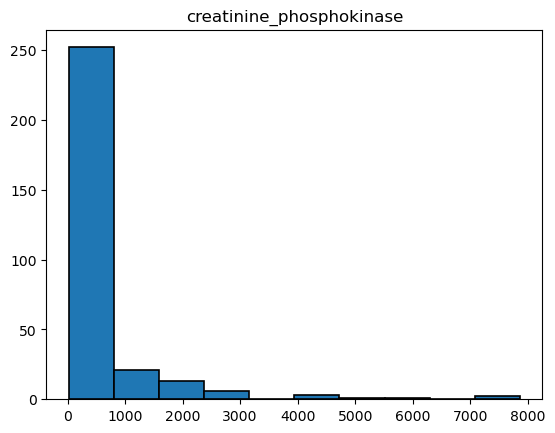

In [91]:
data.hist(column='creatinine_phosphokinase',grid=False,edgecolor='black', linewidth=1.2)

In [84]:
first_25 = data['creatinine_phosphokinase'].sample(n=70,replace=False)
rest_data = data.drop(first_25.index)
second_25 = rest_data['creatinine_phosphokinase'].sample(n=70,replace=False)
rest_data = rest_data.drop(second_25.index)
third_25 = rest_data['creatinine_phosphokinase'].sample(n=70,replace=False)
rest_data = rest_data.drop(third_25.index)
fourth_25 = rest_data['creatinine_phosphokinase'].sample(n=70,replace=False)

(70,)
(70,)
(70,)
(70,)


In [87]:
statistic_result, p_value =  f_oneway(first_25, second_25, third_25, fourth_25)

if(p_value <  0.05):
    print("Reject Null Hypothesis")
else:
    print("Not to Reject NUll Hypothesis")

Not to Reject NUll Hypothesis
